In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_excel('default of credit card clients.xls', header=1)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df['AGE'].min()

21

In [ ]:
df['AGE'].max()

79

In [ ]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [ ]:
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [ ]:
df["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [ ]:
df1 = df.drop('ID',axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
df1 = df1.rename(columns={'default payment next month':'default'})

In [ ]:
df1['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
fil = (df1.EDUCATION == 5) | (df1.EDUCATION == 6) | (df1.EDUCATION == 0)
df1.loc[fil, 'EDUCATION'] = 4
df1.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df1['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df1.loc[df1.MARRIAGE == 0, 'MARRIAGE'] = 3
df1.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
df1 = df1.rename(columns={'PAY_0':'PAY_1'})
df1['PAY_1']

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: PAY_1, Length: 30000, dtype: int64

In [ ]:
df1['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [ ]:
fil = (df1.PAY_1 == -2) | (df1.PAY_1 == -1) | (df1.PAY_1 == 0)
df1.loc[fil, 'PAY_1'] = 0 
fil = (df1.PAY_2 == -2) | (df1.PAY_2 == -1) | (df1.PAY_2 == 0)
df1.loc[fil, 'PAY_2'] = 0
fil = (df1.PAY_3 == -2) | (df1.PAY_3 == -1) | (df1.PAY_3 == 0)
df1.loc[fil, 'PAY_3'] = 0
fil = (df1.PAY_4 == -2) | (df1.PAY_4 == -1) | (df1.PAY_4 == 0)
df1.loc[fil, 'PAY_4'] = 0
fil = (df1.PAY_5 == -2) | (df1.PAY_5 == -1) | (df1.PAY_5 == 0)
df1.loc[fil, 'PAY_5'] = 0
fil = (df1.PAY_6 == -2) | (df1.PAY_6 == -1) | (df1.PAY_6 == 0)
df1.loc[fil, 'PAY_6'] = 0

In [ ]:
fil = (df1.PAY_1 == 0) & (df1.PAY_2 == 0) & (df1.PAY_3 == 0) & (df1.PAY_4 == 0) & (df1.PAY_5 == 0) & (df1.PAY_6 == 0) & (df1.default ==1)
df1.loc[fil,'default'] = 0

In [ ]:
fil = (df1.PAY_1 > 0) & (df1.PAY_2 > 0) & (df1.PAY_3 > 0) & (df1.PAY_4 > 0) & (df1.PAY_5 > 0) & (df1.PAY_6 > 0) & (df1.default ==0)
df1.loc[fil,'default'] = 1

In [ ]:
fil = (df1.BILL_AMT1 < 0) 
df1.loc[fil,'BILL_AMT1'] = 0

fil = (df1.BILL_AMT2 < 0) 
df1.loc[fil,'BILL_AMT2'] = 0

fil = (df1.BILL_AMT3 < 0) 
df1.loc[fil,'BILL_AMT3'] = 0

fil = (df1.BILL_AMT4 < 0) 
df1.loc[fil,'BILL_AMT4'] = 0

fil = (df1.BILL_AMT5 < 0) 
df1.loc[fil,'BILL_AMT5'] = 0

fil = (df1.BILL_AMT6 < 0) 
df1.loc[fil,'BILL_AMT6'] = 0

In [ ]:
df1[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


In [ ]:
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [ ]:
numerical=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
categorical=['EDUCATION','MARRIAGE','SEX','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [ ]:
len(numerical)

14

In [ ]:
len(categorical)

9

In [ ]:
df1.isnull().sum()


LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [ ]:
pd.crosstab(df1['SEX'],df1['default'])

default,0,1
SEX,,
1,9836,2052
2,15464,2648


In [ ]:
gender = df1.groupby(['SEX', 'default']).size().unstack(1)
gender

default,0,1
SEX,,
1,9836,2052
2,15464,2648


In [ ]:
gender['perc'] = (gender[1]/(gender[0] + gender[1])) 
gender

default,0,1,perc
SEX,,,
1,9836,2052,0.172611
2,15464,2648,0.146201


In [ ]:
df1[["SEX", "default"]].groupby(['SEX']).mean().sort_values(by='default')

,default
SEX,
2,0.146201
1,0.172611


In [ ]:
pd.crosstab(df1['LIMIT_BAL'],df1['default'])

default,0,1
LIMIT_BAL,,
10000,347,146
16000,2,0
20000,1385,591
30000,1101,509
40000,148,82
...,...,...
750000,4,0
760000,1,0
780000,2,0


In [ ]:
pd.crosstab(df1['EDUCATION'],df1['default'])

default,0,1
EDUCATION,,
1,9225,1360
2,11627,2403
3,3990,927
4,458,10


In [ ]:
pd.crosstab(df1['MARRIAGE'],df1['default'])

default,0,1
MARRIAGE,,
1,11425,2234
2,13560,2404
3,315,62


In [ ]:
marriage = df1.groupby(['MARRIAGE', 'default']).size().unstack(1)
marriage

default,0,1
MARRIAGE,,
1,11425,2234
2,13560,2404
3,315,62


In [ ]:
marriage['perc'] = (marriage[1]/(marriage[0] + marriage[1])) 
marriage

default,0,1,perc
MARRIAGE,,,
1,11425,2234,0.163555
2,13560,2404,0.150589
3,315,62,0.164456


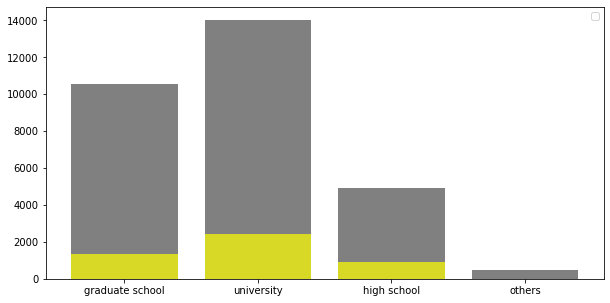

Percentage of Graduate school Default is 12.848370335380254 %
Percentage of University Default is 17.127583749109053 %
Percentage of High school Default is 18.8529591214155 %
Percentage of Others Default is 2.1367521367521367 %


In [ ]:
data = df1.drop('default',axis=1)
outcome = df1['default']


_EDUCATION_RANGE= [1,2,3,4]
plt.figure(figsize=(10,5))

def calculate_percentage (default_count, total_count,label):
    print ("Percentage of {} is {} %".format(label,((total_count * 100) / default_count)))

school= df1['EDUCATION'][data['EDUCATION']==1].count()
school_default = df1['EDUCATION'][(df1['EDUCATION']==1)&(df1['default'])].count()

university= df['EDUCATION'][data['EDUCATION']==2].count()
university_default = df1['EDUCATION'][(df1['EDUCATION']==2)&(df1['default'])].count()

high_school= df1['EDUCATION'][data['EDUCATION']==3].count()
high_school_default = df1['EDUCATION'][(df1['EDUCATION']==3)&(df1['default'])].count()

others= df1['EDUCATION'][data['EDUCATION']==4].count()
others_default = df1['EDUCATION'][(df1['EDUCATION']==4)&(df1['default'])].count()

education_total = [school,university,high_school,others]
default_education_total=  [school_default,university_default,high_school_default,others_default] 


plt.bar(_EDUCATION_RANGE , education_total,color='grey')
plt.bar(_EDUCATION_RANGE , default_education_total,color='yellow', alpha = 0.7)
plt.xticks(_EDUCATION_RANGE,['graduate school','university','high school','others'])

plt.legend()
plt.show()

calculate_percentage(school,school_default,"Graduate school Default")
calculate_percentage(university,university_default,"University Default")
calculate_percentage(high_school,high_school_default,"High school Default")
calculate_percentage(others,others_default,"Others Default")

Gender / Default


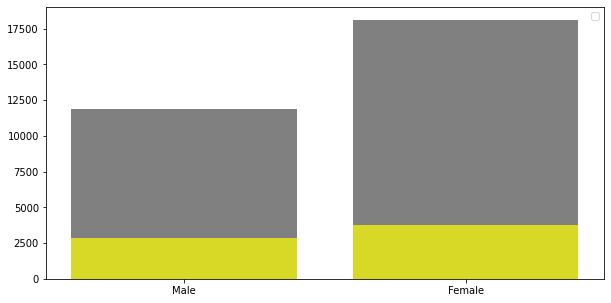

Percentage of Male Default is 24.167227456258413 %
Percentage of Female Default is 20.776280918727917 %


In [ ]:
df['SEX'] =  [ 0 if x==1 else 1 for x in data['SEX']]
data['SEX']= df['SEX']
print("Gender / Default")
plt.figure(figsize=(10,5))
_GENDER_RANGE= [0,1]

male= df['SEX'][data['SEX']==0].count()
male_default = df['SEX'][(df['SEX']==0)&(df['default payment next month']==1)].count()

female=df['SEX'][data['SEX']==1].count()
female_default = df['SEX'][(df['SEX']==1)&(df['default payment next month']==1)].count()

gender_total = [male,female]
default_gender_total = [male_default,female_default]

plt.bar(_GENDER_RANGE,gender_total, color='grey')
plt.bar(_GENDER_RANGE,default_gender_total, color='yellow',alpha = 0.7)
plt.xticks([0,1],['Male','Female'])

plt.legend()
plt.show()
calculate_percentage(male,male_default,"Male Default")
calculate_percentage(female,female_default,"Female Default")

Marriage / Default


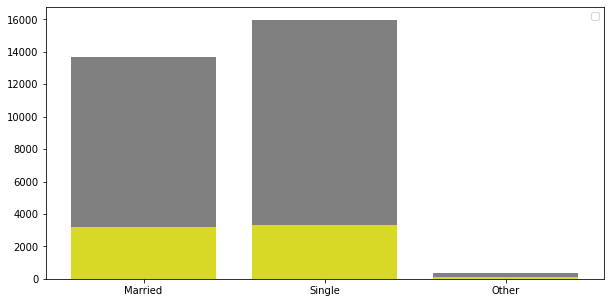

Percentage of Married Default is 23.471703638626547 %
Percentage of Single Default is 20.928338762214985 %
Percentage of Others Default is 22.281167108753316 %


In [ ]:
print("Marriage / Default")
_MARRIAGE_RANGE= [1,2,3]
plt.figure(figsize=(10,5))

married= df['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = df['MARRIAGE'][(df['MARRIAGE']==1)&(df['default payment next month']==1)].count()

single=df['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = df['MARRIAGE'][(df['MARRIAGE']==2)&(df['default payment next month']==1)].count()

others=df['MARRIAGE'][data['MARRIAGE']==3].count()
others_default = df['MARRIAGE'][(df['MARRIAGE']==3)&(df['default payment next month']==1)].count()


marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

plt.bar(_MARRIAGE_RANGE,marriage_total, color='grey')
plt.bar(_MARRIAGE_RANGE,default_marriage_total, color='yellow',alpha = 0.7)
plt.xticks([1,2,3],['Married','Single','Other'])
plt.legend()
plt.show()

calculate_percentage(married,married_default,"Married Default")
calculate_percentage(single,single_default,"Single Default")
calculate_percentage(others,others_default,"Others Default")

Age / Default


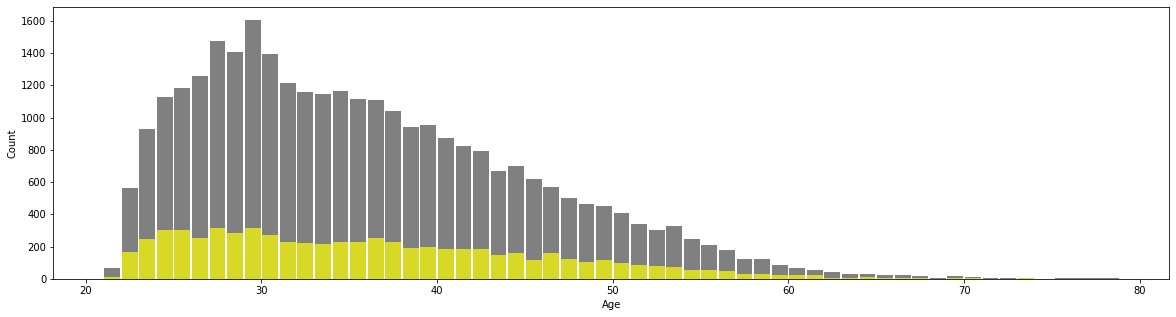

Percentage of 21 is 20.895522388059703 %
Percentage of 22 is 30.178571428571427 %
Percentage of 23 is 26.53061224489796 %
Percentage of 24 is 26.619343389529725 %
Percentage of 25 is 25.463743676222595 %
Percentage of 26 is 20.143312101910826 %
Percentage of 27 is 21.19160460392688 %
Percentage of 28 is 20.298083747338538 %
Percentage of 29 is 19.501557632398754 %
Percentage of 30 is 19.6415770609319 %
Percentage of 31 is 18.816762530813477 %
Percentage of 32 is 19.430051813471504 %
Percentage of 33 is 18.760907504363 %
Percentage of 34 is 19.879518072289155 %
Percentage of 35 is 20.305480682839175 %
Percentage of 36 is 22.924187725631768 %
Percentage of 37 is 21.998078770413063 %
Percentage of 38 is 20.550847457627118 %
Percentage of 39 is 20.859538784067087 %
Percentage of 40 is 21.49425287356322 %
Percentage of 41 is 22.45145631067961 %
Percentage of 42 is 23.299748110831235 %
Percentage of 43 is 22.388059701492537 %
Percentage of 44 is 23.142857142857142 %
Percentage of 45 is 18.80

In [ ]:
print("Age / Default")
plt.figure(figsize=(20,5))
plt.hist(data['AGE'], sorted(data['AGE'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['AGE'][(df['default payment next month']==1)], sorted(data['AGE'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

age_persentage_dataframe = pd.DataFrame(columns=['Age', 'Percentage'])

for x in sorted(data['AGE'].unique()):
    calculate_percentage(
                         df['AGE'][df['AGE']==x ].count(),df['AGE'][(df['AGE']==x )&(df['default payment next month']==1)].count(), x
                               )

Limit Balance / Default


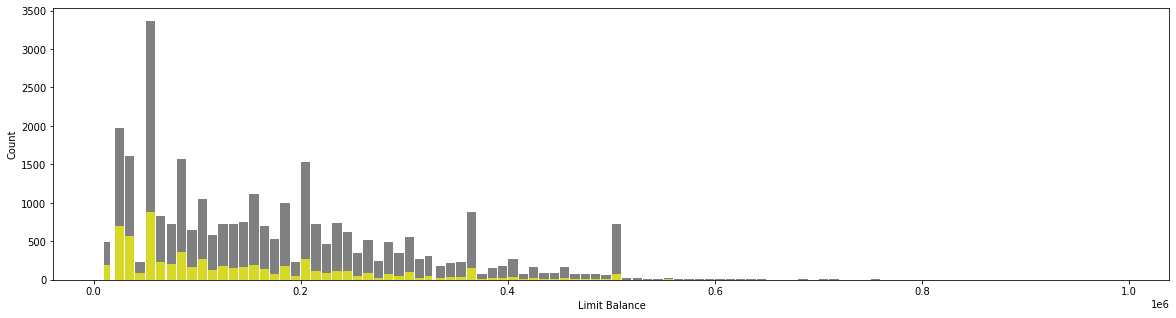

<Figure size 1440x72 with 0 Axes>

In [ ]:
print("Limit Balance / Default")
plt.figure(figsize=(20,5))
plt.hist(data['LIMIT_BAL'], sorted(data['LIMIT_BAL'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['LIMIT_BAL'][(df['default payment next month']==1)], sorted(data['LIMIT_BAL'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.figure(figsize=(20,1))
plt.show()

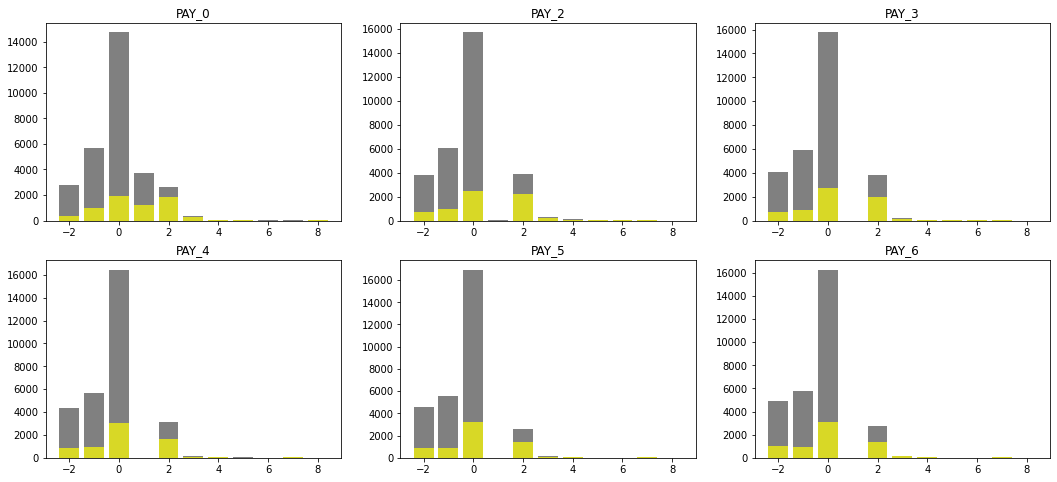

In [ ]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in [0,2,3,4,5,6]]

pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['default payment next month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='grey')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

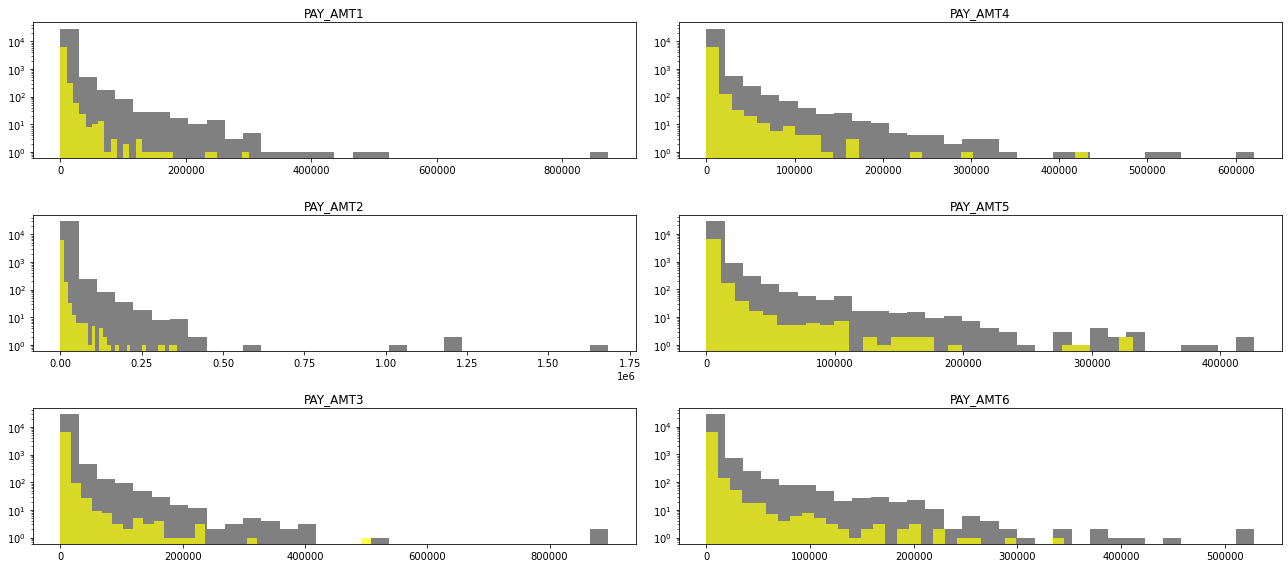

In [ ]:
def getColumnsNames1(prefix):
    return [prefix+str(x) for x in [1,2,3,4,5,6]]


pay_amt_columns = getColumnsNames1('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='grey')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['default payment next month']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df['SEX'],df['default payment next month'])

default payment next month,0,1
SEX,,
0,9015,2873
1,14349,3763


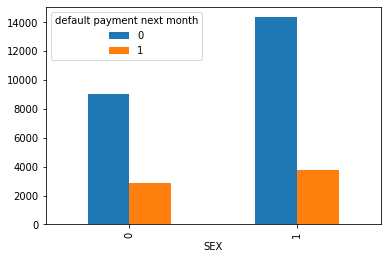

In [ ]:
pd.crosstab(df['SEX'],df['default payment next month']).plot(kind='bar')

In [ ]:
pd.crosstab(df1['EDUCATION'],df1['default'])

default,0,1
EDUCATION,,
1,9225,1360
2,11627,2403
3,3990,927
4,458,10


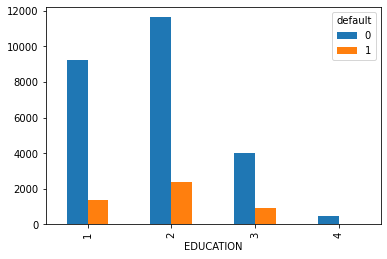

In [ ]:
pd.crosstab(df1['EDUCATION'],df1['default']).plot(kind='bar')

In [ ]:
pd.crosstab(df1['MARRIAGE'],df1['default'])

default,0,1
MARRIAGE,,
1,11425,2234
2,13560,2404
3,315,62


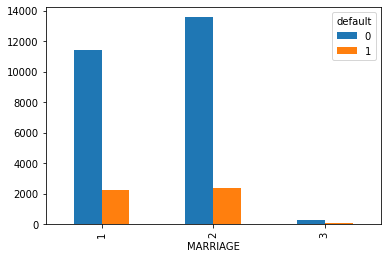

In [ ]:
pd.crosstab(df1['MARRIAGE'],df1['default']).plot(kind='bar')

In [ ]:
pd.crosstab(df1[df1['AGE']<40]['AGE'],df1['default'])

default,0,1
AGE,,
21,57,10
22,435,125
23,744,187
24,883,244
25,959,227
26,1063,193
27,1244,233
28,1196,213
29,1383,222


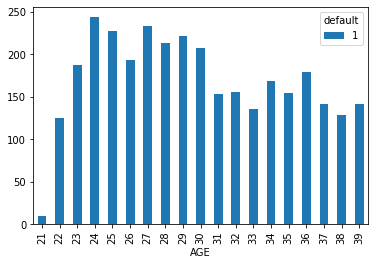

In [ ]:
pd.crosstab(df1[df1['AGE']<40]['AGE'],df1[df1['default']==1]['default']).plot(kind='bar')

In [ ]:
pd.crosstab(df1[df1['AGE']>40]['AGE'],df1['default'])

default,0,1
AGE,,
41,706,118
42,659,135
43,562,108
44,595,105
45,536,81
46,462,108
47,411,90
48,395,71
49,375,77


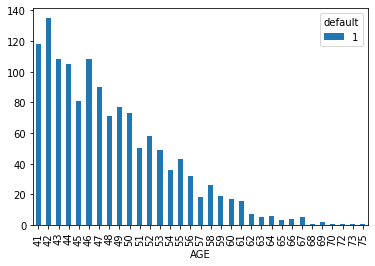

In [ ]:
pd.crosstab(df1[df1['AGE']>40]['AGE'],df1[df1['default']==1]['default']).plot(kind='bar')

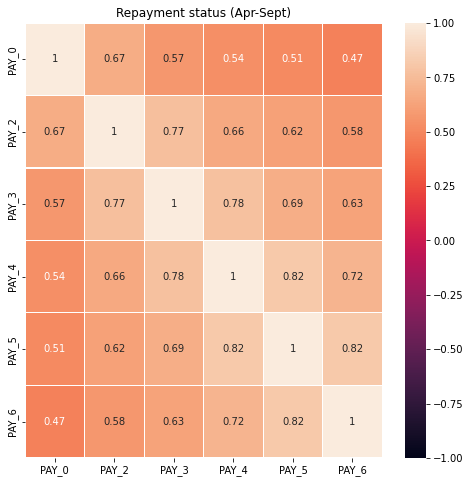

In [ ]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)
plt.show()

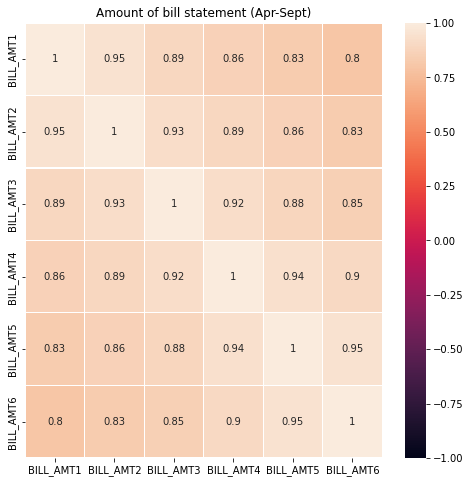

In [ ]:
var = [ 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept)')
corr = df1[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)
plt.show()

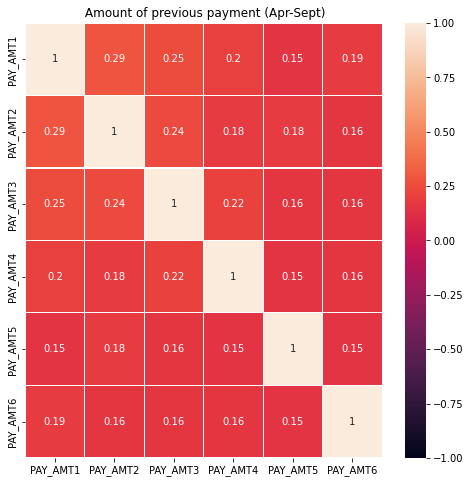

In [ ]:
var = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize = (8,8))
plt.title(' Amount of previous payment (Apr-Sept)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)
plt.show()

In [ ]:
X = df1.drop(["default"],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["features"] = df1[numerical].columns
vif["VIF Factor"] = [variance_inflation_factor(df1[numerical].values, i) for i in range(df1[numerical].shape[1])]
vif

,features,VIF Factor
0,LIMIT_BAL,3.214525
1,AGE,2.742125
2,BILL_AMT1,20.765828
3,BILL_AMT2,38.151359
4,BILL_AMT3,31.884624
5,BILL_AMT4,29.533860
6,BILL_AMT5,36.247306
7,BILL_AMT6,21.715329
8,PAY_AMT1,1.867920
9,PAY_AMT2,2.356896


 Distribution Plot of  LIMIT_BAL


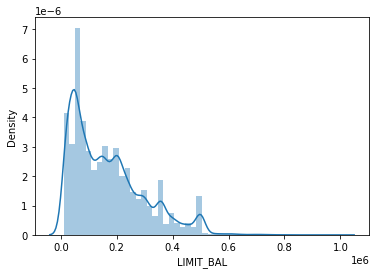

 Distribution Plot of  SEX


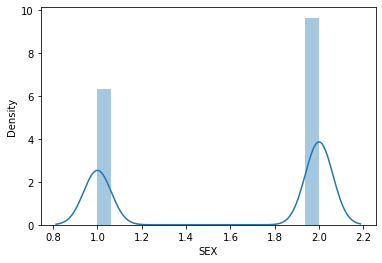

 Distribution Plot of  EDUCATION


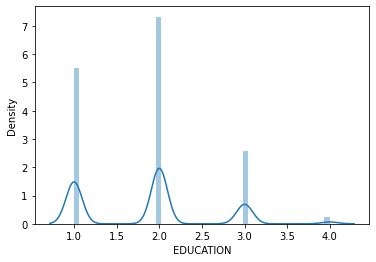

 Distribution Plot of  MARRIAGE


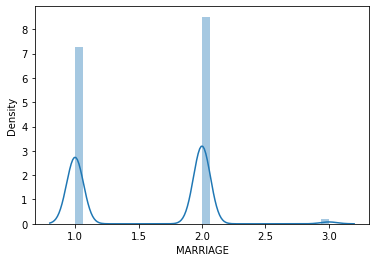

 Distribution Plot of  AGE


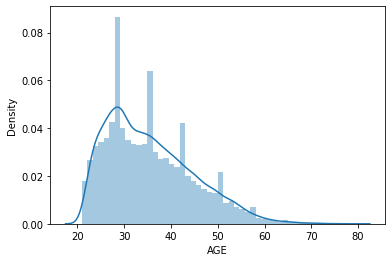

 Distribution Plot of  PAY_1


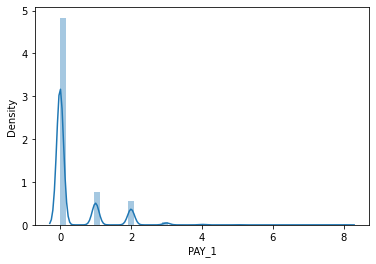

 Distribution Plot of  PAY_2


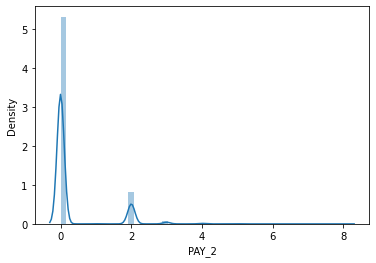

 Distribution Plot of  PAY_3


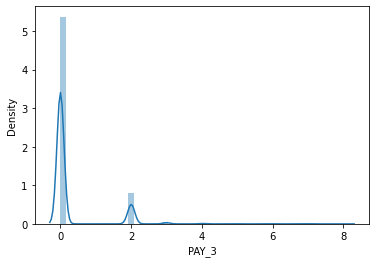

 Distribution Plot of  PAY_4


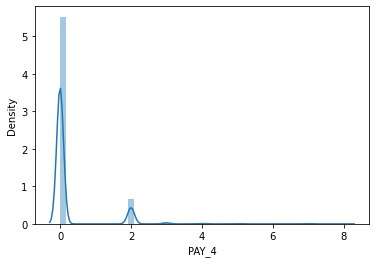

 Distribution Plot of  PAY_5


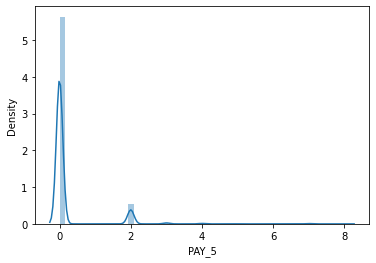

 Distribution Plot of  PAY_6


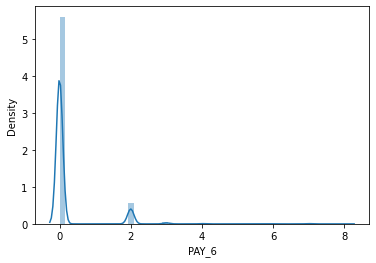

 Distribution Plot of  BILL_AMT1


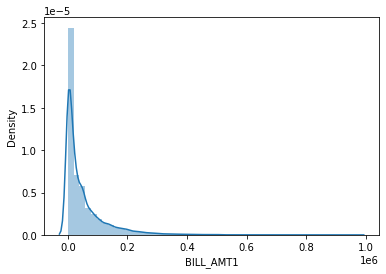

 Distribution Plot of  BILL_AMT2


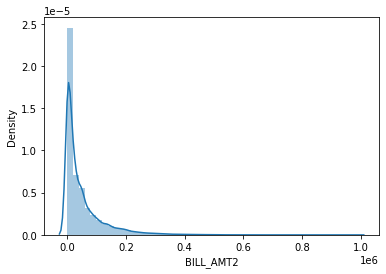

 Distribution Plot of  BILL_AMT3


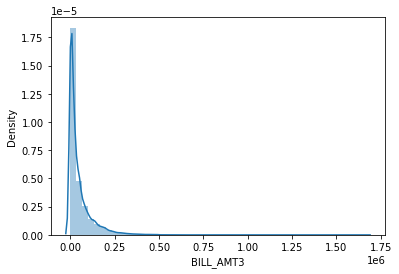

 Distribution Plot of  BILL_AMT4


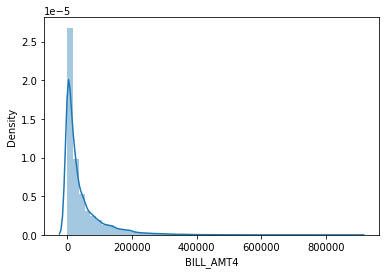

 Distribution Plot of  BILL_AMT5


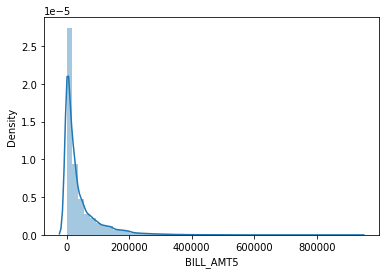

 Distribution Plot of  BILL_AMT6


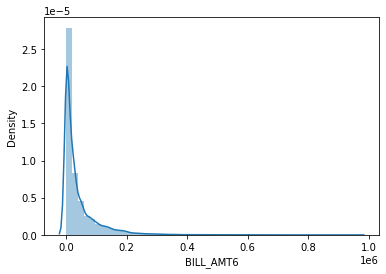

 Distribution Plot of  PAY_AMT1


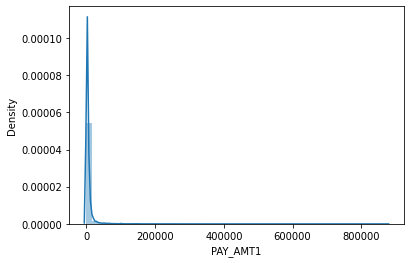

 Distribution Plot of  PAY_AMT2


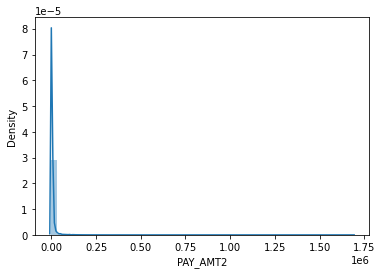

 Distribution Plot of  PAY_AMT3


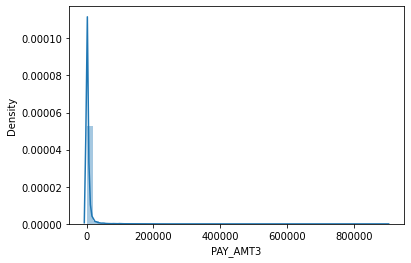

 Distribution Plot of  PAY_AMT4


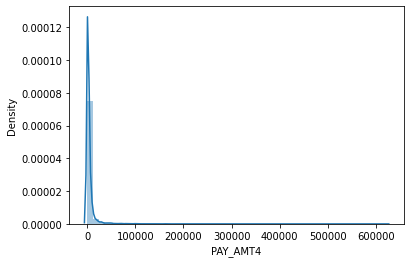

 Distribution Plot of  PAY_AMT5


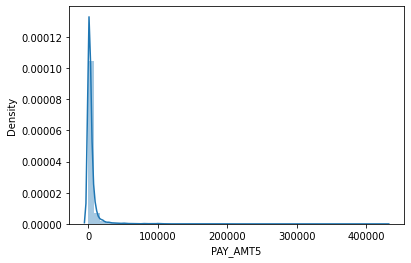

 Distribution Plot of  PAY_AMT6


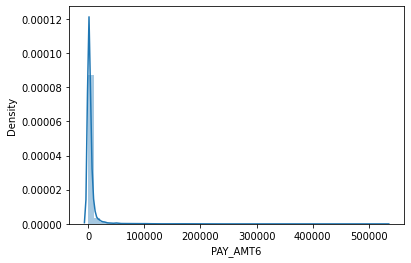

 Distribution Plot of  default


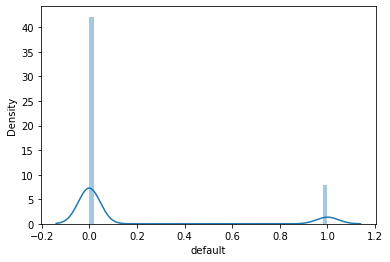

In [ ]:
for cols in df1.columns:
    sns.distplot(df1[cols])
    print(' Distribution Plot of ',cols)
    plt.show()

 Box Plot of LIMIT_BAL


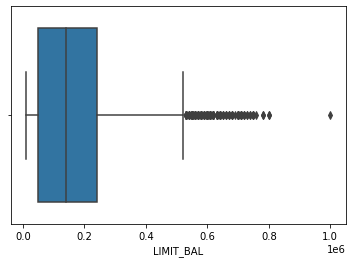

 Box Plot of AGE


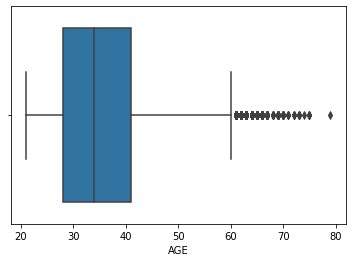

 Box Plot of BILL_AMT1


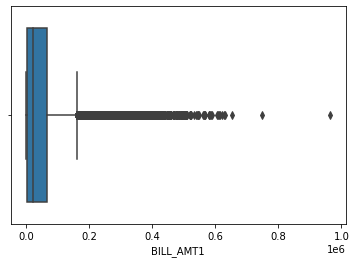

 Box Plot of BILL_AMT2


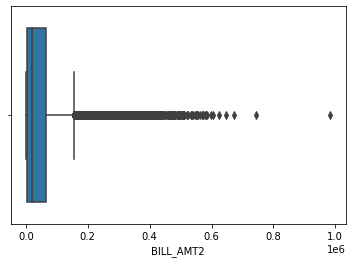

 Box Plot of BILL_AMT3


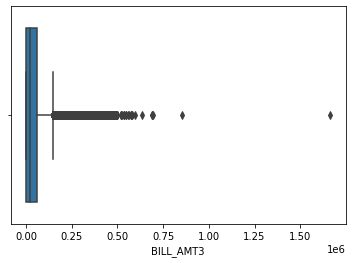

 Box Plot of BILL_AMT4


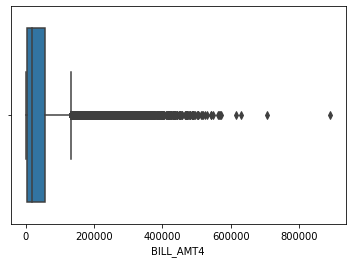

 Box Plot of BILL_AMT5


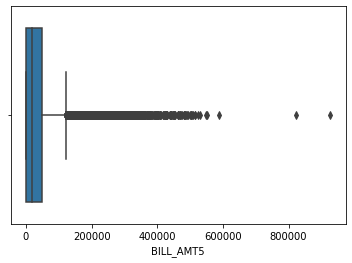

 Box Plot of BILL_AMT6


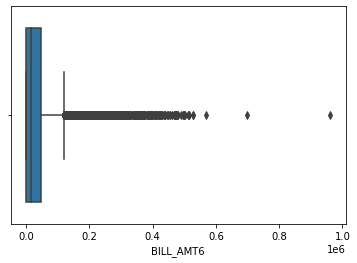

 Box Plot of PAY_AMT1


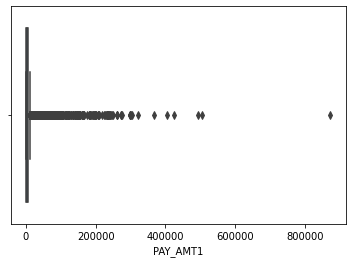

 Box Plot of PAY_AMT2


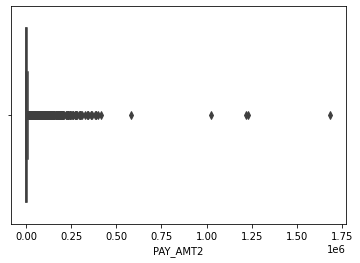

 Box Plot of PAY_AMT3


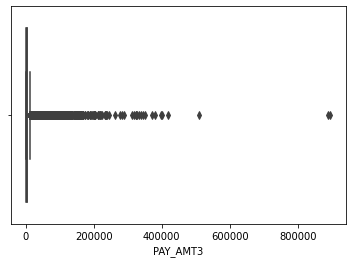

 Box Plot of PAY_AMT4


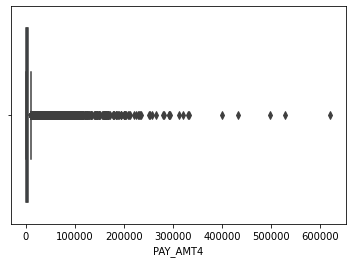

 Box Plot of PAY_AMT5


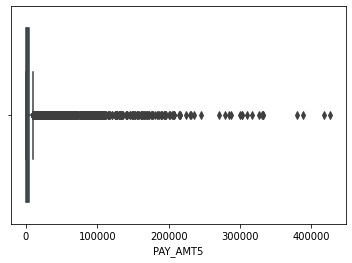

 Box Plot of PAY_AMT6


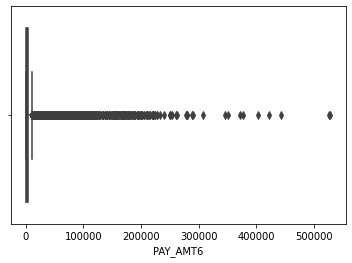

In [ ]:
for cols in numerical:
    sns.boxplot(df1[cols])
    print(' Box Plot of',cols)
    plt.show()

In [ ]:
df1[["LIMIT_BAL","AGE"]].describe()

,LIMIT_BAL,AGE
count,30000.000000,30000.000000
mean,167484.322667,35.485500
std,129747.661567,9.217904
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


In [ ]:
df1[['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


In [ ]:
df1[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.00000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51246.04190,49206.518033,4.704517e+04,43299.651933,40347.092100,38942.268767
std,73608.02908,71150.744613,6.931878e+04,64294.968472,60766.619726,59445.970807
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3558.75000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.50000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.00000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.00000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
df1[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


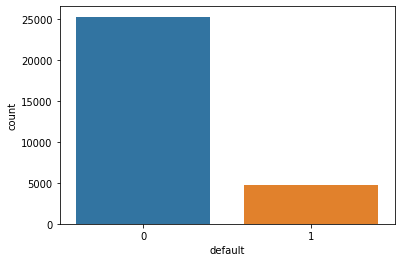

In [ ]:
sns.countplot(df1.default)

In [ ]:
df1['default'].value_counts()/len(df1)*100

0    84.333333
1    15.666667
Name: default, dtype: float64

In [ ]:
categorical = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical = ['LIMIT_BAL','AGE' ,'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
print("No of Outliers Record");print()
for i in df1[numerical]:
    u = df1[i].quantile(0.75) + 1.5*(df1[i].quantile(0.75)-df1[i].quantile(0.25))
    print(i , " : " , df1[df1[i] > u][i].count())

No of Outliers Record

LIMIT_BAL  :  167
AGE  :  272
BILL_AMT1  :  2398
BILL_AMT2  :  2395
BILL_AMT3  :  2468
BILL_AMT4  :  2620
BILL_AMT5  :  2724
BILL_AMT6  :  2688
PAY_AMT1  :  2745
PAY_AMT2  :  2714
PAY_AMT3  :  2598
PAY_AMT4  :  2994
PAY_AMT5  :  2945
PAY_AMT6  :  2958


In [ ]:
 from scipy.stats import chi2, chi2_contingency

In [ ]:
categorical = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [ ]:
chi_pvalue=[]
chi_name=[]

def chi_sq(cat):
    cont = pd.crosstab(df1['default'],df1[cat])
    chi_pvalue.append(chi2_contingency(cont)[1])
    chi_name.append(cat)
for cat in categorical:
    chi_sq(cat)
    chi_data=pd.DataFrame()
    chi_data['Pvalue']=chi_pvalue
    chi_data.index=chi_name

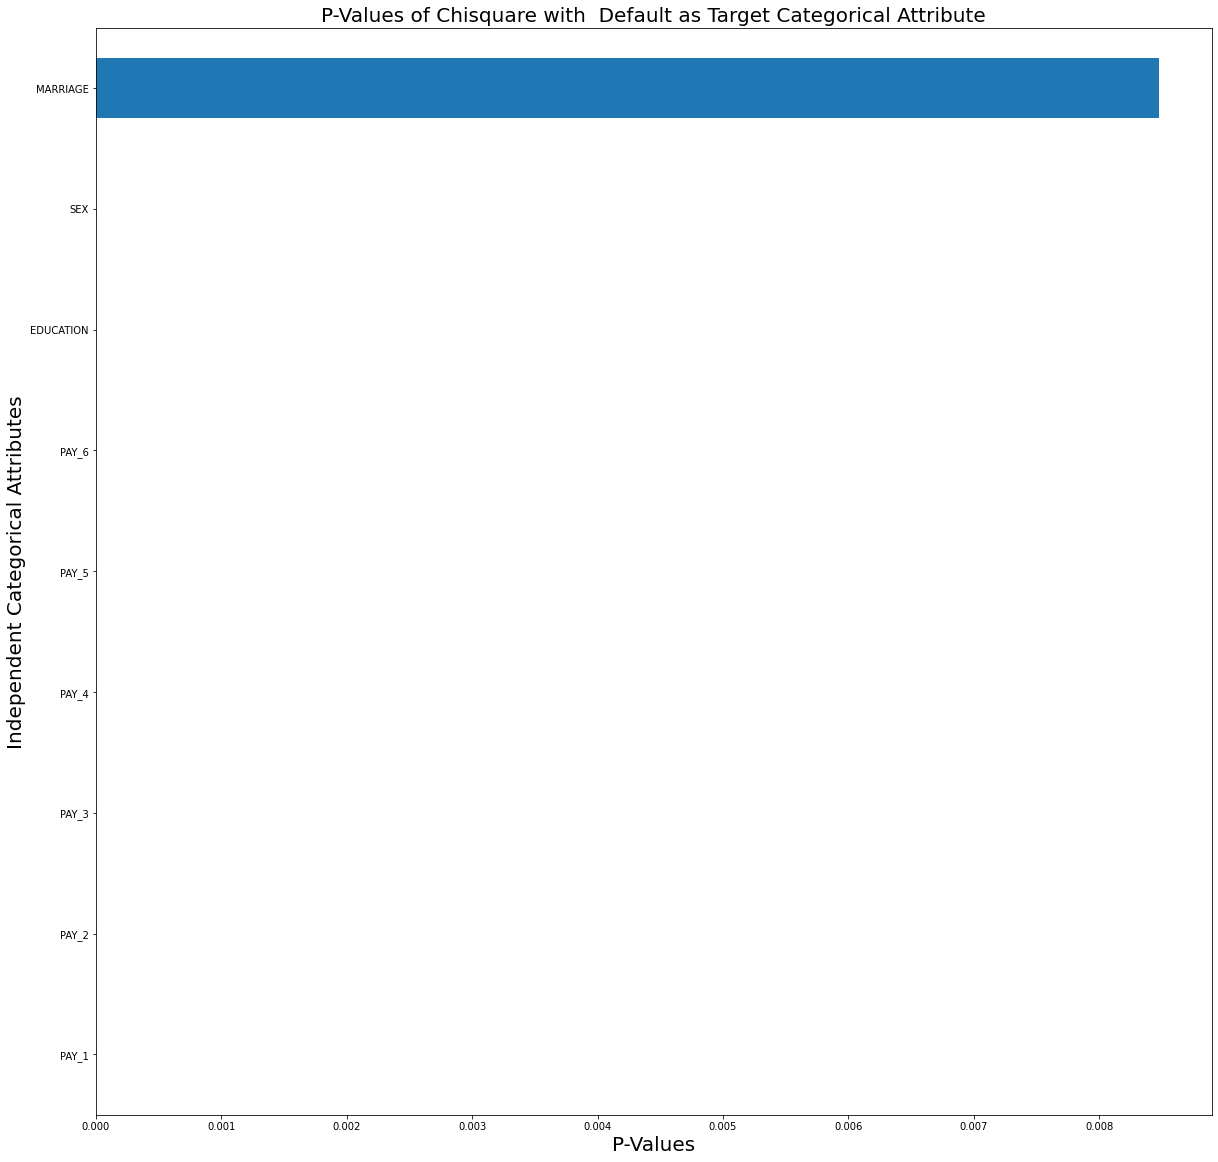

In [ ]:
plt.figure(figsize=(20,20))

plt.title('P-Values of Chisquare with '' Default'' as Target Categorical Attribute',fontsize=20)

x=chi_data.Pvalue.sort_values().plot(kind='barh')

x.set_xlabel('P-Values',fontsize=20)

x.set_ylabel('Independent Categorical Attributes',fontsize=20)

plt.show()

In [ ]:
X = df1.drop('default',axis=1)
Y = df1['default']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=23)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(20,'Score'))

        Specs         Score
0   LIMIT_BAL  1.057492e+08
18   PAY_AMT2  9.582460e+06
17   PAY_AMT1  8.290986e+06
22   PAY_AMT6  6.986573e+06
20   PAY_AMT4  6.067629e+06
19   PAY_AMT3  6.039725e+06
21   PAY_AMT5  5.947016e+06
16  BILL_AMT6  2.106857e+06
15  BILL_AMT5  1.726431e+06
11  BILL_AMT1  9.045943e+05
14  BILL_AMT4  5.777365e+05
12  BILL_AMT2  8.573634e+04
5       PAY_1  1.890309e+04
6       PAY_2  1.848116e+04
7       PAY_3  1.588063e+04
8       PAY_4  1.584077e+04
9       PAY_5  1.580411e+04
10      PAY_6  1.393191e+04
13  BILL_AMT3  1.922741e+02
2   EDUCATION  1.476439e+01


In [ ]:
x = df1.drop('default',axis=1)
y = df1['default']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_trainc = sm.add_constant(x_train)
x_testc = sm.add_constant(x_test)

In [ ]:
logit_model = sm.Logit(y_train,x_trainc)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.219637
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20976
Method:                           MLE   Df Model:                           23
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.4960
Time:                        13:54:09   Log-Likelihood:                -4612.4
converged:                       True   LL-Null:                       -9151.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6493      0.228    -11.604      0.000      -3.097      -2.202
LIMIT_BAL  -1.095e-06   2.89e-07     -3.786      0.000   -1.66e-06   -5.28e-07
SEX           -0.0738      0.057     -1.284      0.199      -0.186       0.039
EDUCATION     -0.2070      0.042     -4.962      0.000      -0.289      -0.125
MARRIAGE      -0.1558      0.060     -2.603      0.009      -0.273      -0.039
AGE            0.0080      0.003      2.392      0.017       0.001       0.014
PAY_1          1.6822      0.039     42.827      0.000       1.605       1.759
PAY_2          0.1918      0.038      5.063      0.000       0.118       0.266
PAY_3          0.3691      0.043      8.526      0.000       0.284       0.454
PAY_4          0.3588      0.048      7.471      0.000       0.265       0.453
PAY_5          0.2774      0.051      5.447      0.000       0.178       0.377
PAY_6          0.6498      0.043     15.102      0.000       0.565       0.734
BILL_AMT1  -7.855e-06   2.42e-06     -3.241      0.001   -1.26e-05    -3.1e-06
BILL_AMT2   8.904e-06   2.87e-06      3.100      0.002    3.27e-06    1.45e-05
BILL_AMT3  -3.265e-06   2.67e-06     -1.221      0.222   -8.51e-06    1.98e-06
BILL_AMT4   8.139e-07   2.77e-06      0.294      0.769   -4.61e-06    6.24e-06
BILL_AMT5   4.766e-06   2.92e-06      1.633      0.103   -9.55e-07    1.05e-05
BILL_AMT6  -2.674e-06   2.28e-06     -1.174      0.240   -7.14e-06    1.79e-06
PAY_AMT1   -1.268e-05   4.42e-06     -2.867      0.004   -2.14e-05   -4.01e-06
PAY_AMT2   -1.108e-05   4.79e-06     -2.315      0.021   -2.05e-05    -1.7e-06
PAY_AMT3   -2.324e-06   3.01e-06     -0.771      0.441   -8.23e-06    3.58e-06
PAY_AMT4   -8.305e-06   3.95e-06     -2.101      0.036   -1.61e-05   -5.58e-07
PAY_AMT5   -7.438e-06   4.38e-06     -1.699      0.089    -1.6e-05    1.14e-06
PAY_AMT6   -1.317e-05   3.28e-06     -4.021      0.000   -1.96e-05   -6.75e-06
==============================================================================
"""

In [ ]:
y_prob = result.predict(x_testc)
y_prob.head()

2308     0.033607
22404    0.027917
23397    0.029415
25058    0.027317
2664     0.078943
dtype: float64

In [ ]:
y_test_data = pd.DataFrame(y_test)
y_test_data['prob'] = y_prob

In [ ]:
y_test_data['y_pred'] = y_test_data['prob'].apply(lambda x:1 if x>=0.1 else 0)
y_test_data

,default,prob,y_pred
2308,0,0.033607,0
22404,0,0.027917,0
23397,0,0.029415,0
25058,0,0.027317,0
2664,1,0.078943,0
...,...,...,...
3941,1,0.133603,1
17854,0,0.028721,0
95,0,0.030076,0
6279,0,0.029615,0


In [ ]:
cm = confusion_matrix(y_test_data['default'],y_test_data['y_pred'])
cm

array([[6451, 1160],
       [ 128, 1261]])

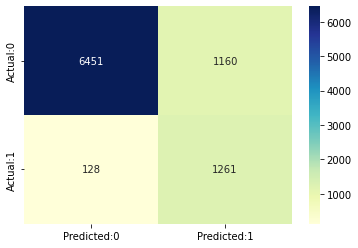

In [ ]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [ ]:
fpr,tpr,threshold = roc_curve(y_test_data['default'],y_test_data['prob'])

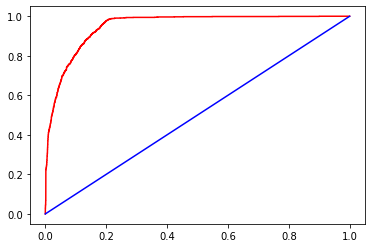

In [ ]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [ ]:
roc_auc_score(y_test_data['default'],y_test_data['prob'])

0.9494643187709351

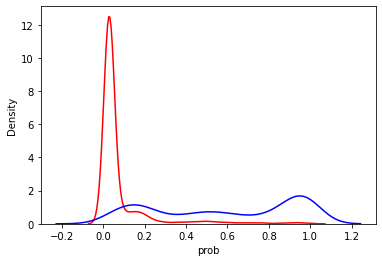

In [ ]:
df2 = y_test_data[y_test_data['default']==0]
df3 = y_test_data[y_test_data['default']==1]
sns.kdeplot(df2['prob'],color='r')
sns.kdeplot(df3['prob'],color='b')

In [ ]:
SS = StandardScaler()

In [ ]:
df1[numerical] = pd.DataFrame(SS.fit_transform(df1[numerical]))

In [ ]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,-1.136720,2,2,1,-1.246020,2,2,0,0,0,...,-0.673464,-0.663979,-0.655098,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,2,2,2,-1.029047,0,2,0,0,0,...,-0.622573,-0.607121,-0.600240,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.450566,-0.417985,-0.393528,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,-0.233080,-0.187410,-0.158050,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,1,2,1,2.334029,0,0,0,0,0,...,-0.347773,-0.348900,-0.333271,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [ ]:
from imblearn.over_sampling import SMOTE

x = df1.drop('default',axis=1)
y = df1['default']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

smt = SMOTE(random_state=33)
x_train_new, y_train_new = smt.fit_resample(x_train, y_train.ravel())
from collections import Counter
print(sorted(Counter(y_train_new).items()))

[(0, 17689), (1, 17689)]


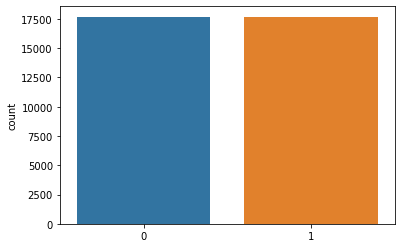

In [ ]:
sns.countplot(y_train_new)

Logistic Regression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train_new,y_train_new)
log_reg_train_score = log_reg.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',log_reg_train_score)

Training Accuracy Score :  0.8684775849397931


In [ ]:
y_pred_lg = log_reg.predict(x_test)
log_reg_test_score = accuracy_score(y_test,y_pred_lg)
print('Testing Accuracy Score : ',log_reg_test_score)

Testing Accuracy Score :  0.8798888888888889


In [ ]:
cm = confusion_matrix(y_test,y_pred_lg)
cm

array([[6762,  849],
       [ 232, 1157]])

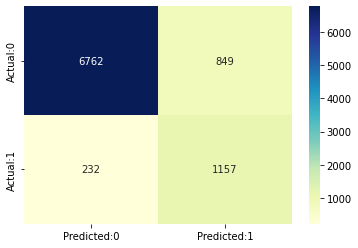

In [ ]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [ ]:
log_reg_f1_score = f1_score(y_test,y_pred_lg)
print(log_reg_f1_score)

0.6815905743740795


In [ ]:
log_reg_precision_score = precision_score(y_test,y_pred_lg)
print(log_reg_precision_score)

0.5767696909272183


In [ ]:
log_reg_recall_score = recall_score(y_test,y_pred_lg)
print(log_reg_recall_score)

0.8329733621310296


In [ ]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7611
           1       0.58      0.83      0.68      1389

    accuracy                           0.88      9000
   macro avg       0.77      0.86      0.80      9000
weighted avg       0.91      0.88      0.89      9000



In [ ]:
y_prob = log_reg.predict_proba(x_test)[:,1]
y_prob

array([0.13256506, 0.07150262, 0.08423471, ..., 0.08664585, 0.09202165,
       0.12417251])

In [ ]:
y_prob = log_reg.predict_proba(x_test)[:,1]
y_prob

array([0.13256506, 0.07150262, 0.08423471, ..., 0.08664585, 0.09202165,
       0.12417251])

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

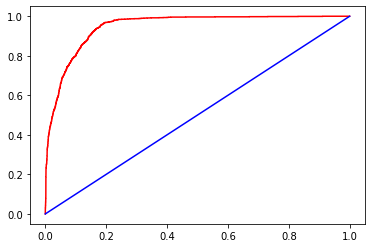

In [ ]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [ ]:
log_reg_roc = roc_auc_score(y_test,y_prob)
print(log_reg_roc)

0.9468762719715573


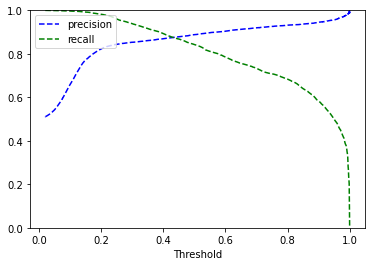

In [ ]:
from sklearn.metrics import precision_recall_curve
y_scores=log_reg.predict_proba(x_train_new)
prec, rec, tre = precision_recall_curve(y_train_new, y_scores[:,1], )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Hyper Parameter Tuning

In [ ]:
param_grid = [{'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6],'penalty':['l1','l2']}]

In [ ]:
gs = GridSearchCV(log_reg,param_grid,cv=3,scoring='accuracy')
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [ ]:
gs.best_params_

{'C': 0.2, 'penalty': 'l2'}

In [ ]:
gs.best_score_

0.9080476190476191

In [ ]:
log_reg_gs = LogisticRegression(**gs.best_params_) 

In [ ]:
log_reg_gs.fit(x_train_new,y_train_new)
log_reg_train_hp = log_reg_gs.score(x_train_new,y_train_new)
print(log_reg_train_hp)

0.8682797218610436


In [ ]:
y_pred1 = log_reg_gs.predict(x_test)
log_reg_test_hp = accuracy_score(y_test,y_pred1)
print(log_reg_test_hp)

0.8798888888888889


In [ ]:
cm = confusion_matrix(y_test,y_pred1)
cm

array([[6762,  849],
       [ 232, 1157]])

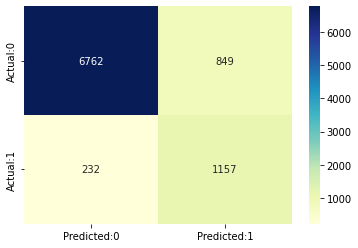

In [ ]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [ ]:
log_reg_f1_score_hp = f1_score(y_test,y_pred1)
print(log_reg_f1_score_hp)

0.6815905743740795


In [ ]:
log_reg_precision_score_hp = precision_score(y_test,y_pred1)
print(log_reg_precision_score_hp)

0.5767696909272183


In [ ]:
log_reg_recall_score_hp = recall_score(y_test,y_pred1)
print(log_reg_recall_score_hp)

0.8329733621310296


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7611
           1       0.58      0.83      0.68      1389

    accuracy                           0.88      9000
   macro avg       0.77      0.86      0.80      9000
weighted avg       0.91      0.88      0.89      9000



In [ ]:
y_prob = log_reg_gs.predict_proba(x_test)[:,1]
y_prob

array([0.13278312, 0.07294006, 0.08457489, ..., 0.08776262, 0.09216906,
       0.12451049])

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

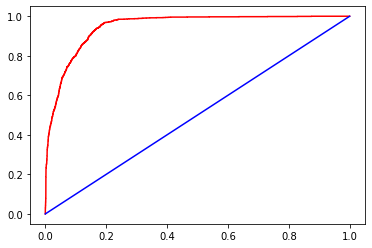

In [ ]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [ ]:
log_reg_roc_hp = roc_auc_score(y_test,y_prob)
print(log_reg_roc_hp)

0.9470142822157199


In [ ]:
logistic_regressor = LogisticRegression()

logistic_regressor.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logistic_train_score = logistic_regressor.score(x_train, y_train)
logistic_test_score = logistic_regressor.score(x_test, y_test)
logistic_prediction = logistic_regressor.predict(x_test)

print('Train Score: {0}\nTest Score: {1}'.format(logistic_train_score, logistic_test_score))

Train Score: 0.9082380952380953
Test Score: 0.9068888888888889


In [ ]:
logistic_mse = mean_squared_error(y_test, logistic_prediction)
logistic_rmse = np.sqrt(logistic_mse)
print(logistic_mse, logistic_rmse)

0.09311111111111112 0.30514113310255486


KNN Model

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_new,y_train_new)
knn_train_score = knn.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',knn_train_score)

Training Accuracy Score :  0.941630391768896


In [ ]:
y_pred_knn = knn.predict(x_test)
knn_test_score = accuracy_score(y_test,y_pred_knn)
print('Testing Accuracy Score',knn_test_score)

Testing Accuracy Score 0.8618888888888889


In [ ]:
cm = confusion_matrix(y_test,y_pred_knn)
cm

array([[6581, 1030],
       [ 213, 1176]])

In [ ]:
knn_f1_score = f1_score(y_test,y_pred_knn)
print(knn_f1_score)

0.6542420027816411


In [ ]:
knn_recall_score = recall_score(y_test,y_pred_knn)
print(knn_recall_score)

0.8466522678185745


In [ ]:
knn_precision_score = precision_score(y_test,y_pred_knn)
print(knn_precision_score)

0.5330915684496826


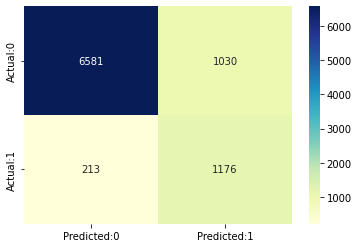

In [ ]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7611
           1       0.53      0.85      0.65      1389

    accuracy                           0.86      9000
   macro avg       0.75      0.86      0.78      9000
weighted avg       0.90      0.86      0.87      9000



In [ ]:
y_prob = knn.predict_proba(x_test)[:,1]
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

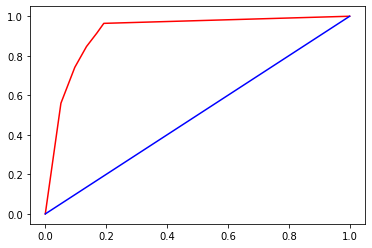

In [ ]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [ ]:
knn_roc = roc_auc_score(y_test,y_prob)
print(knn_roc)

0.91921160300081


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(knn_train_score, knn_test_score))

Train score: 0.9115238095238095
Test score: 0.901


In [ ]:
knn_prediction = knn_classifier.predict(x_test)

knn_classifier_mse = mean_squared_error(y_test, knn_prediction)
knn_classifier_rmse = np.sqrt(knn_classifier_mse)

print('MSE: {}\nRMSE: {}'.format(knn_classifier_mse, knn_classifier_rmse))

MSE: 0.099
RMSE: 0.31464265445104544


Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train_new,y_train_new)
dt_train_score = dt.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',dt_train_score)

Training Accuracy Score :  0.9997738707671434


In [ ]:
y_pred_dt = dt.predict(x_test)
dt_test_score = accuracy_score(y_test,y_pred_dt)
print('Testing Accuracy Score : ',dt_test_score)

Testing Accuracy Score :  0.8706666666666667


In [ ]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[6858,  753],
       [ 411,  978]])

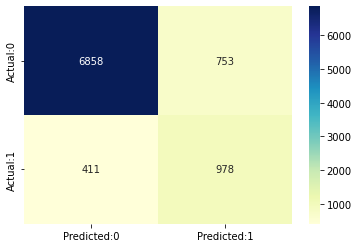

In [ ]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [ ]:
dt_f1_score = f1_score(y_test,y_pred_dt)
print(dt_f1_score)

0.6269230769230769


In [ ]:
dt_precision_score = precision_score(y_test,y_pred_dt)
print(dt_precision_score)

0.5649913344887348


In [ ]:
dt_recall_score = recall_score(y_test,y_pred_dt)
print(dt_recall_score)

0.7041036717062635


In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7611
           1       0.56      0.70      0.63      1389

    accuracy                           0.87      9000
   macro avg       0.75      0.80      0.77      9000
weighted avg       0.89      0.87      0.88      9000



In [ ]:
y_prob = dt.predict_proba(x_test)[:,1]
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

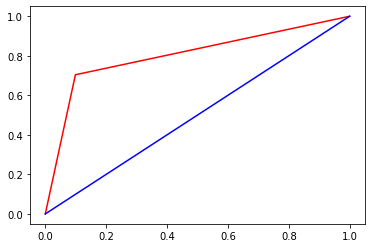

In [ ]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [ ]:
dt_roc = roc_auc_score(y_test,y_prob)
print(dt_roc)

0.8025450829522917


Hyper Parameter Tuning

In [ ]:
params = {
    'max_depth' : np.arange(3,10),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : [5,10,20,100],
    'min_samples_split' : [2,5,10,20]
}

In [ ]:
gs = GridSearchCV(dt,params,cv=3,scoring='accuracy')
gs.fit(x_train_new,y_train_new)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': [5, 10, 20, 100],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [ ]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_split': 2}

In [ ]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(x_train_new,y_train_new)
dt_train_hp = dt.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',dt_train_hp)

Training Accuracy Score :  0.9179433546271695


In [ ]:
y_pred_dt = dt.predict(x_test)
dt_test_hp = accuracy_score(y_test,y_pred_dt)
print('Testing Accuracy Score : ',dt_test_hp)


Testing Accuracy Score :  0.8546666666666667


In [ ]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[6423, 1188],
       [ 120, 1269]])

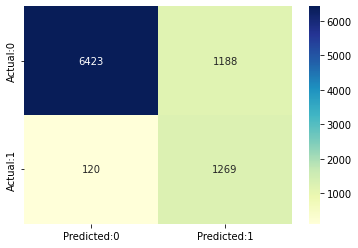

In [ ]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [ ]:
dt_f1_score_hp = f1_score(y_test,y_pred_dt)
print(dt_f1_score_hp)

0.6599063962558502


In [ ]:
dt_precision_score_hp = precision_score(y_test,y_pred_dt)
print(dt_precision_score_hp)

0.5164835164835165


In [ ]:
dt_recall_score_hp = recall_score(y_test,y_pred_dt)
print(dt_recall_score_hp)

0.9136069114470843


In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7611
           1       0.52      0.91      0.66      1389

    accuracy                           0.85      9000
   macro avg       0.75      0.88      0.78      9000
weighted avg       0.91      0.85      0.87      9000



In [ ]:
y_prob = dt.predict_proba(x_test)[:,1]
y_prob

array([0.00050165, 0.00050165, 0.00050165, ..., 0.00050165, 0.00050165,
       0.00050165])

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_dt)

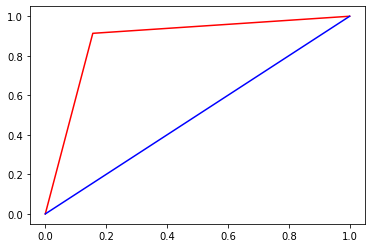

In [ ]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [ ]:
dt_roc_hp = roc_auc_score(y_test,y_prob)
print(dt_roc_hp)

0.94421751738773


Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train_new,y_train_new)
rf_train_score = rfc.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',rf_train_score)

Training Accuracy Score :  0.9997738707671434


In [ ]:
y_pred_rf = rfc.predict(x_test)
rf_test_score = accuracy_score(y_test,y_pred_rf)
print('Testing Accuracy Score : ',rf_test_score)

Testing Accuracy Score :  0.8826666666666667


In [ ]:
cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[6836,  775],
       [ 281, 1108]])

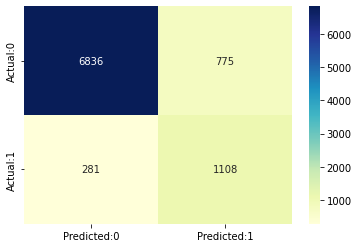

In [ ]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [ ]:
rf_f1_score = f1_score(y_test,y_pred_rf)
print(rf_f1_score)

0.6772616136919315


In [ ]:
rf_recall_score = recall_score(y_test,y_pred_rf)
print(rf_recall_score)

0.7976961843052556


In [ ]:
rf_precision_score = precision_score(y_test,y_pred_rf)
print(rf_precision_score)

0.5884227296866702


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      7611
           1       0.59      0.80      0.68      1389

    accuracy                           0.88      9000
   macro avg       0.77      0.85      0.80      9000
weighted avg       0.90      0.88      0.89      9000



In [ ]:
y_prob = rfc.predict_proba(x_test)[:,1]
y_prob

array([0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

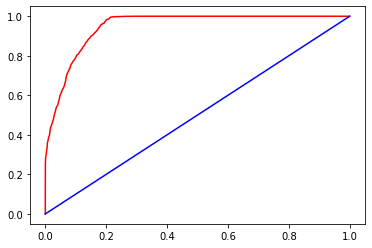

In [ ]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [ ]:
rf_roc = roc_auc_score(y_test,y_prob)
print(rf_roc)

0.9475207769740266


Hyper Parameter Tuning

In [ ]:
params = {
    'n_estimators' : range(10,100,10),
    'max_depth' : range(2,10,1),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
rs = RandomizedSearchCV(rfc,param_distributions=params,cv=3,n_jobs= -1, scoring='accuracy')
rs.fit(x_train_new,y_train_new)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 10),
                                        'max_features': ['auto', 'log2'],
                                        'max_leaf_nodes': range(2, 10),
                                        'n_estimators': range(10, 100, 10)},
                   scoring='accuracy')

In [ ]:
rs.best_params_

{'n_estimators': 80,
 'max_leaf_nodes': 6,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'entropy'}

In [ ]:
rfc = RandomForestClassifier(**rs.best_params_)
rfc.fit(x_train_new,y_train_new)
rf_train_hp = rfc.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',rf_train_hp)

Training Accuracy Score :  0.8787099327265532


In [ ]:
y_pred_rf = rfc.predict(x_test)
rf_test_hp = accuracy_score(y_test,y_pred_rf)
print('Testing Accuracy Score',rf_test_hp)


Testing Accuracy Score 0.8596666666666667


In [ ]:
cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[6484, 1127],
       [ 136, 1253]])

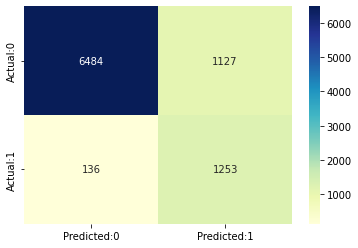

In [ ]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [ ]:
rf_f1_score_hp = f1_score(y_test,y_pred_rf)
print(rf_f1_score_hp)

0.66489785088883


In [ ]:
rf_recall_score_hp = recall_score(y_test,y_pred_rf)
print(rf_recall_score_hp)

0.9020878329733621


In [ ]:
rf_precision_score_hp = precision_score(y_test,y_pred_rf)
print(rf_precision_score_hp)

0.5264705882352941


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7611
           1       0.53      0.90      0.66      1389

    accuracy                           0.86      9000
   macro avg       0.75      0.88      0.79      9000
weighted avg       0.91      0.86      0.87      9000



In [ ]:
y_prob = rfc.predict_proba(x_test)[:,1]
y_prob

array([0.2379902 , 0.16489281, 0.17947801, ..., 0.19701018, 0.14829561,
       0.15730102])

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

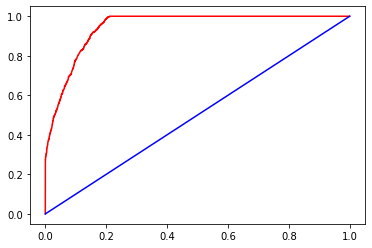

In [ ]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [ ]:
rf_roc_hp = roc_auc_score(y_test,y_prob)
print(rf_roc_hp)

0.945993961791689


In [ ]:
rfc.feature_importances_

array([0.04188241, 0.00039764, 0.        , 0.        , 0.        ,
       0.33265613, 0.16910643, 0.1039485 , 0.10982032, 0.1009816 ,
       0.07997454, 0.00636646, 0.00286033, 0.00234825, 0.00184633,
       0.00329286, 0.00270475, 0.01253014, 0.01274354, 0.00628809,
       0.00056061, 0.00349208, 0.00619899])

In [ ]:
names = df1.drop('default',axis=1)
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names),reverse=True))

[(0.3327, 'PAY_1'), (0.1691, 'PAY_2'), (0.1098, 'PAY_4'), (0.1039, 'PAY_3'), (0.101, 'PAY_5'), (0.08, 'PAY_6'), (0.0419, 'LIMIT_BAL'), (0.0127, 'PAY_AMT2'), (0.0125, 'PAY_AMT1'), (0.0064, 'BILL_AMT1'), (0.0063, 'PAY_AMT3'), (0.0062, 'PAY_AMT6'), (0.0035, 'PAY_AMT5'), (0.0033, 'BILL_AMT5'), (0.0029, 'BILL_AMT2'), (0.0027, 'BILL_AMT6'), (0.0023, 'BILL_AMT3'), (0.0018, 'BILL_AMT4'), (0.0006, 'PAY_AMT4'), (0.0004, 'SEX'), (0.0, 'MARRIAGE'), (0.0, 'EDUCATION'), (0.0, 'AGE')]


In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=20, min_samples_split=15, min_impurity_decrease=0.05)
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.05, min_samples_split=15,
                       n_estimators=20)

In [ ]:
random_forest_train_score = random_forest_classifier.score(x_train,y_train)
random_forest_test_score = random_forest_classifier.score(x_test,y_test)
print('Train score: {}\nTest score: {}'.format(random_forest_train_score, random_forest_test_score))

Train score: 0.8894761904761905
Test score: 0.8898888888888888


In [ ]:
random_forest_prediction = random_forest_classifier.predict(x_test)

random_forest_mse = mean_squared_error(y_test, random_forest_prediction)
random_forest_rmse = np.sqrt(random_forest_mse)

print('MSE: {}\nRMSE: {}'.format(random_forest_mse, random_forest_rmse))

MSE: 0.11011111111111112
RMSE: 0.3318299430598618


Naive Bias

In [ ]:
nb = GaussianNB()
nb.fit(x_train_new,y_train_new)
nb_train_score = nb.score(x_train_new,y_train_new)
print('Trainining Accuracy Score : ',nb_train_score)

Trainining Accuracy Score :  0.8712194018881791


In [ ]:
y_pred_nb = nb.predict(x_test)
nb_test_score = accuracy_score(y_test,y_pred_nb)
print('Testing Accuracy Score : ',nb_test_score)

Testing Accuracy Score :  0.8497777777777777


In [ ]:
cm = confusion_matrix(y_test,y_pred_nb)
cm

array([[6422, 1189],
       [ 163, 1226]])

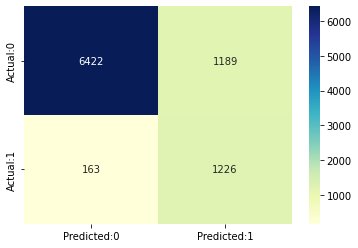

In [ ]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [ ]:
nb_f1_score = f1_score(y_test,y_pred_nb)
print(nb_f1_score)

0.6445846477392219


In [ ]:
nb_precision_score = precision_score(y_test,y_pred_nb)
print(nb_precision_score)

0.5076604554865425


In [ ]:
nb_recall_score = recall_score(y_test,y_pred_nb)
print(nb_recall_score)

0.8826493880489561


In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7611
           1       0.51      0.88      0.64      1389

    accuracy                           0.85      9000
   macro avg       0.74      0.86      0.77      9000
weighted avg       0.90      0.85      0.86      9000



In [ ]:
y_prob = nb.predict_proba(x_test)[:,1]
y_prob

array([0.14517726, 0.03931454, 0.0904541 , ..., 0.1277179 , 0.0185551 ,
       0.01695997])

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

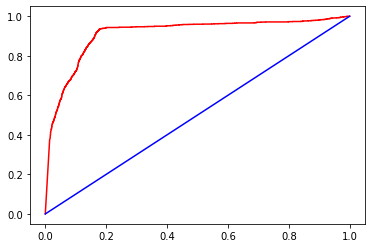

In [ ]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [ ]:
nb_roc = roc_auc_score(y_test,y_prob)
print(nb_roc)

0.9110590191018854


In [ ]:
model = {
    'Train Accuracy' : [log_reg_train_score,knn_train_score,dt_train_score,rf_train_score,nb_train_score],
    'Test Accuracy' : [log_reg_test_score,knn_test_score,dt_test_score,rf_test_score,nb_test_score],
    'F1 Score' : [log_reg_f1_score,knn_f1_score,dt_f1_score,rf_f1_score,nb_f1_score],
    'Recall Score' : [log_reg_recall_score,knn_recall_score,dt_recall_score,rf_recall_score,nb_recall_score],
    'Precision Score' : [log_reg_precision_score,knn_precision_score,dt_precision_score,rf_precision_score,nb_precision_score],
    'Roc Auc Score' : [log_reg_roc,knn_roc,dt_roc,rf_roc,nb_roc]
}

In [ ]:
result_base_models = pd.DataFrame(model,index=['Logistic Regression Model','K Nearest Neighbor Model','Decision Tree Model',
                                               'Random Forest Model','Naive Bias']) 
result_base_models

,Train Accuracy,Test Accuracy,F1 Score,Recall Score,Precision Score,Roc Auc Score
Logistic Regression Model,0.868478,0.879889,0.681591,0.832973,0.576770,0.946876
K Nearest Neighbor Model,0.911524,0.901000,0.654242,0.846652,0.533092,0.919212
Decision Tree Model,0.999774,0.870667,0.626923,0.704104,0.564991,0.802545
Random Forest Model,0.999774,0.882667,0.677262,0.797696,0.588423,0.947521
Naive Bias,0.871219,0.849778,0.644585,0.882649,0.507660,0.911059


In [ ]:
model = {
    'Train Accuracy' : [log_reg_train_score,knn_train_score,dt_train_score,rf_train_score,nb_train_score,log_reg_train_hp,dt_train_hp,rf_train_hp],
    'Test Accuracy' : [log_reg_test_score,knn_test_score,dt_test_score,rf_test_score,nb_test_score,log_reg_test_hp,dt_test_hp,rf_test_hp],
    'F1 Score' : [log_reg_f1_score,knn_f1_score,dt_f1_score,rf_f1_score,nb_f1_score,log_reg_f1_score_hp,dt_f1_score_hp,rf_f1_score_hp],
    'Recall Score' : [log_reg_recall_score,knn_recall_score,dt_recall_score,rf_recall_score,nb_recall_score,log_reg_recall_score_hp,dt_recall_score_hp,rf_recall_score_hp],
    'Precision Score' : [log_reg_precision_score,knn_precision_score,dt_precision_score,rf_precision_score,nb_precision_score,log_reg_precision_score_hp,dt_precision_score_hp,rf_precision_score_hp],
    'Roc Auc Score' : [log_reg_roc,knn_roc,dt_roc,rf_roc,nb_roc,log_reg_roc_hp,dt_roc_hp,rf_roc_hp]
}

In [ ]:
result_all_models = pd.DataFrame(model,index=['Logistic Regression Model','K Nearest Neighbor Model','Decision Tree Model',
                                               'Random Forest Model','Naive Bias Model','Logistic Regression with Hyper Parameter Tuning',
                                               'Decision Tree with Hyper Parameter Tuning','Random Forest with Hyper Parameter Tuning']) 
result_all_models

,Train Accuracy,Test Accuracy,F1 Score,Recall Score,Precision Score,Roc Auc Score
Logistic Regression Model,0.868478,0.879889,0.681591,0.832973,0.576770,0.946876
K Nearest Neighbor Model,0.911524,0.901000,0.654242,0.846652,0.533092,0.919212
Decision Tree Model,0.999774,0.870667,0.626923,0.704104,0.564991,0.802545
Random Forest Model,0.999774,0.882667,0.677262,0.797696,0.588423,0.947521
Naive Bias Model,0.871219,0.849778,0.644585,0.882649,0.507660,0.911059
Logistic Regression with Hyper Parameter Tuning,0.868280,0.879889,0.681591,0.832973,0.576770,0.947014
Decision Tree with Hyper Parameter Tuning,0.917943,0.854667,0.659906,0.913607,0.516484,0.944218
Random Forest with Hyper Parameter Tuning,0.878710,0.859667,0.664898,0.902088,0.526471,0.945994


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X, y)

LogisticRegression()

In [ ]:
importance = model.coef_[0]

In [ ]:
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


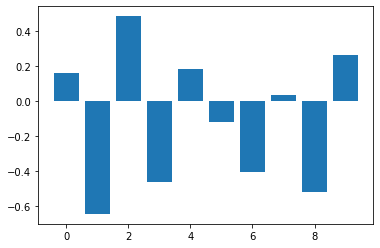

In [ ]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()